In [2]:
import networkx as nx
import numpy as np
import pandas as pd
from data_loader import *
import igraph as ig
import config
import matplotlib.pyplot as plt

In [3]:
print('hi')

hi


In [4]:
G = read_pkl_graph("graph_no_attributes.pkl")

In [5]:
_p = load_profile_data(config.PROFILES_PATH)
P = profile_data_to_df(_p)

In [51]:
# match nodes with attributes

In [56]:
P2 = P.copy()
P2.dropna(inplace=True)
P2 = P2.astype({'user_id':str, 'gender':'int64', 'age':'int64'})
user_ids = P2['user_id'].to_list()
P2.set_index('user_id', inplace=True)

In [ ]:
for v in G.vs:
    if v['name'] in user_ids:
        v['gender'] = P2.loc[v['name']][0]

In [ ]:
### implement random walk sampler first!

In [ ]:
# implement random walk

In [59]:
G.density()

1.148614349725155e-05

In [4]:
num_males = len(P[P['gender'] == '1'])
print(num_males)

804336


In [5]:
num_females = len(P) - num_males
num_females2 = len(P[P['gender'] == '0'])
print(num_females)
print(num_females2)

828467
828304


In [36]:
assert num_males + num_females == G.vcount()

In [42]:
h = G.degree_distribution()

In [45]:
print(h)

N = 1632803, mean +- sd: 37.5092 +- 59.5256
Each * represents 2600 items
[    1,     2): ***************************************************** (137823)
[    2,     3): *************************************** (102517)
[    3,     4): ***************************** (76277)
[    4,     5): ************************* (65305)
[    5,     6): ********************* (54936)
[    6,     7): ****************** (48401)
[    7,     8): **************** (43197)
[    8,     9): *************** (39418)
[    9,    10): ************* (35904)
[   10,    11): ************ (33097)
[   11,    12): *********** (30829)
[   12,    13): *********** (28819)
[   13,    14): ********** (26712)
[   14,    15): ********* (25649)
[   15,    16): ********* (23931)
[   16,    17): ******** (22880)
[   17,    18): ******** (21793)
[   18,    19): ******** (20898)
[   19,    20): ******* (19969)
[   20,    21): ******* (18912)
[   21,    22): ******* (18319)
[   22,    23): ****** (17598)
[   23,    24): ****** (17002)
[ 

In [53]:
b = list(h.bins())

In [58]:
bins = [i[0] for i in b]
vals = [i[-1] for i in b]

In [65]:
vals[-1]

1

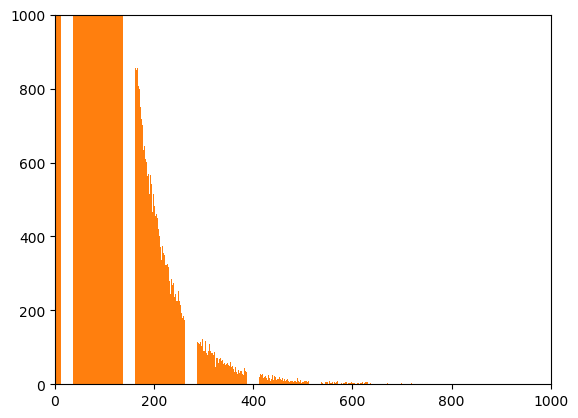

In [67]:
plt.bar(bins, vals)
plt.xlim(left=0, right=1000)
plt.ylim(bottom=0, top=1000)
plt.show()